### Improvements 
## IMP: Fitrar por la surface--remove events that move out of the surface on the first 3 secons
1) Remove blinks and interpolate values using cubic splines
2) Blank filtering of data---Done-- maibe explore other filter
3) Frequency analysis of the signal??
4) Remove trials with z scores over [2,-2]
5) Convert time to seconds
6) Open PLA file
7) Statistics of signal ¿How to compare surprise signals?
8) Amplitud, velocidad de cambio
9) Cut the whole signal of interest from the beggining
10) Fitrar por la surface


### Simple pupillometry code to merge different experiments


In [15]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append('../')
import commons as cm
from data_curation import Normalization
from pandasql import sqldf

nm=Normalization()

session_location = Path(r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\01 ONGOING\Exp_Stgo_0001\SESSIONS")
sessions=[]
df_list=[]
windows_s=2
with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()

session_loc_list=[session_location.joinpath(session,'01 Processing_data','pupil_labs') for session in sessions ]
session_raw_list=[session_location.joinpath(session, '00 Raw_data','pupil_labs') for session in sessions ]

image_loc_list=[session_location.joinpath(session,'images_order') for session in sessions ]

for subject, recording_location in zip(session,session_loc_list):
    recording_folder=[record for record in os.listdir(recording_location)  if '00' in record]

    if len(recording_folder)>1:
        ValueError('Ambiguty in folder of experiment')
    recording_location=recording_location.joinpath(recording_folder[0],'exports')
    recording_location_raw=recording_location.joinpath(recording_folder[0],'exports')
    export_folder=[record for record in os.listdir(recording_location)  if '00' in record]
    if len(export_folder)>1:
        ValueError('Ambiguty in folder of exports')
    recording_location=recording_location.joinpath(export_folder[0])


    gaze_surf_csv=[record for record in os.listdir(recording_location.joinpath('surfaces'))  if 'gaze_positions' in record][0]

    exported_pupil_csv = recording_location.joinpath('pupil_positions.csv')
    pupil_pd_frame = pd.read_csv(exported_pupil_csv)
    exported_gaze_csv = os.path.join(recording_location,'gaze_positions.csv')
    gaze_pd_frame = pd.read_csv(exported_gaze_csv)
    annotations_csv = os.path.join(recording_location,'annotations.csv')
    annotations_pd = pd.read_csv(annotations_csv)
    surface_gaze_csv = os.path.join(recording_location, 'surfaces',gaze_surf_csv)
    surfaces_pd_frame = pd.read_csv(surface_gaze_csv)

    df=calculate_pupillometry(pupil_pd_frame,annotations_pd,windows_s)
    df['session']=subject
    df_list.append(df)

,index,timestamp,label,duration
0,7625,9572.150979,blank_0,NaN


index                  39854
timestamp       10112.144156
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
29719,9572.169202,0,1.0,0.324405,0.534213,6.253656
29731,9572.193114,0,1.0,0.324547,0.533762,6.242186
29758,9572.249205,0,1.0,0.324346,0.534391,6.250127
29762,9572.257196,0,1.0,0.324348,0.534489,6.251022
29771,9572.273236,0,1.0,0.324532,0.534570,6.253679
29779,9572.289197,0,1.0,0.324260,0.534487,6.252661
29786,9572.305190,0,1.0,0.324429,0.534535,6.251123
29790,9572.317067,0,1.0,0.324724,0.534523,6.260817
29811,9572.357182,0,1.0,0.324531,0.534123,6.255196
29818,9572.373185,0,1.0,0.324623,0.534170,6.246114


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
29753,9572.237214,1,1.0,0.410697,0.409990,4.678681
29764,9572.261283,1,1.0,0.411005,0.409822,4.671783
29798,9572.333201,1,1.0,0.410769,0.409980,4.680658
29832,9572.397243,1,1.0,0.411086,0.410369,4.662371
29856,9572.445203,1,1.0,0.414414,0.401879,4.656652
29872,9572.477340,1,1.0,0.415122,0.399138,4.649022
30119,9572.977231,1,1.0,0.414299,0.399188,4.630336
30173,9573.085216,1,1.0,0.414492,0.399084,4.626332
30225,9573.189192,1,1.0,0.414579,0.399286,4.631597
30269,9573.277209,1,1.0,0.415150,0.399138,4.638862


sampling frequency for right eye is 123.97295546251496
sampling frequency for left eye is 123.95094581632272
Total blinks time left 49.63s and right 161.87s of a total of 539.90s left and 539.79s right
Total blinks time left 9.19% 
Total blinks time right 29.99% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 248 correspond to 2s


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936

,index,timestamp,label,duration
0,6231,21605.402144,blank_0,NaN


index                  38467
timestamp       22145.537089
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
27765,21605.408741,0,1.0,0.284626,0.389995,3.382902
27768,21605.416753,0,1.0,0.284369,0.390273,3.376803
27772,21605.424743,0,1.0,0.284869,0.389900,3.378112
27777,21605.432794,0,1.0,0.284316,0.390457,3.381869
27781,21605.440737,0,1.0,0.284666,0.389829,3.381178
27784,21605.448756,0,1.0,0.284084,0.390367,3.358883
27789,21605.456747,0,1.0,0.284421,0.390444,3.378102
27795,21605.468776,0,1.0,0.284084,0.390084,3.350436
27798,21605.476735,0,1.0,0.284299,0.389967,3.375322
27800,21605.484744,0,1.0,0.284280,0.389817,3.361320


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
27762,21605.404760,1,1.0,0.481373,0.650023,3.854079
27767,21605.412763,1,1.0,0.481700,0.649529,3.835313
27771,21605.420751,1,1.0,0.481426,0.649610,3.854716
27774,21605.428784,1,1.0,0.481407,0.649611,3.857699
27778,21605.436758,1,1.0,0.481650,0.649172,3.859017
27782,21605.444750,1,1.0,0.481189,0.649116,3.826485
27787,21605.452777,1,1.0,0.480952,0.649187,3.836398
27791,21605.460620,1,1.0,0.480807,0.648455,3.843133
27793,21605.468615,1,1.0,0.480856,0.648919,3.836189
27797,21605.476629,1,1.0,0.480896,0.648438,3.841331


sampling frequency for right eye is 123.92823997814095
sampling frequency for left eye is 123.93008313418737
Total blinks time left 90.56s and right 75.91s of a total of 540.13s left and 540.13s right
Total blinks time left 16.77% 
Total blinks time right 14.05% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 248 correspond to 2s


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936

,index,timestamp,label,duration
0,4006,6067.756932,blank_0,NaN


index                  36234
timestamp        6607.750312
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26946,6067.758305,0,1.0,0.450920,0.433232,4.346266
26950,6067.766276,0,1.0,0.451212,0.433131,4.355639
26954,6067.774295,0,1.0,0.451257,0.432859,4.364024
26958,6067.782198,0,1.0,0.451293,0.432948,4.364615
26962,6067.790189,0,1.0,0.451294,0.432568,4.359343
26966,6067.798197,0,1.0,0.451105,0.432747,4.360388
26970,6067.806154,0,1.0,0.451023,0.432901,4.356136
26974,6067.814233,0,1.0,0.451134,0.432183,4.367269
26978,6067.822279,0,1.0,0.451015,0.432742,4.377519
26982,6067.830187,0,1.0,0.451095,0.432335,4.369494


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26949,6067.762275,1,1.0,0.446569,0.457980,4.360013
26953,6067.770273,1,1.0,0.446736,0.457797,4.351802
26960,6067.786163,1,1.0,0.446787,0.458051,4.364897
26965,6067.794152,1,1.0,0.446731,0.457863,4.360782
26968,6067.802287,1,1.0,0.446695,0.458096,4.374876
26972,6067.810144,1,1.0,0.446409,0.457985,4.374529
26977,6067.818153,1,1.0,0.446187,0.458270,4.385975
26981,6067.826172,1,1.0,0.446704,0.458164,4.378388
26989,6067.842339,1,1.0,0.446911,0.458204,4.378041
26992,6067.850167,1,1.0,0.446593,0.458097,4.396063


sampling frequency for right eye is 123.93226135414996
sampling frequency for left eye is 123.93223796131947
Total blinks time left 38.76s and right 39.02s of a total of 539.98s left and 539.99s right
Total blinks time left 7.18% 
Total blinks time right 7.23% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 248 correspond to 2s


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936

,index,timestamp,label,duration
0,22584,10760.888059,blank_0,NaN


index                  54809
timestamp       11300.860597
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26956,10760.910901,0,1.0,0.614965,0.686995,2.395908
26960,10760.918882,0,1.0,0.615230,0.686991,2.412694
26968,10760.934774,0,1.0,0.614913,0.686712,2.384029
26973,10760.942756,0,1.0,0.614695,0.687072,2.404576
26992,10760.982869,0,1.0,0.615139,0.686766,2.386963
27008,10761.014875,0,1.0,0.615093,0.686865,2.397291
27012,10761.022880,0,1.0,0.614987,0.687258,2.417748
27018,10761.038842,0,1.0,0.615175,0.687070,2.387552
27024,10761.046864,0,1.0,0.614909,0.687580,2.373119
27027,10761.054810,0,1.0,0.615419,0.687085,2.382236


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
26947,10760.890840,1,1.0,0.558069,0.560846,2.364782
26954,10760.906848,1,1.0,0.557940,0.561083,2.379628
26959,10760.914695,1,1.0,0.558274,0.561112,2.361689
26962,10760.922784,1,1.0,0.557807,0.560928,2.377216
26975,10760.946688,1,1.0,0.557982,0.560471,2.350385
26979,10760.958689,1,1.0,0.557932,0.560769,2.360600
26983,10760.966674,1,1.0,0.558185,0.560710,2.358574
27029,10761.054837,1,1.0,0.558166,0.560794,2.355827
27032,10761.062898,1,1.0,0.558139,0.560434,2.351435
27035,10761.070801,1,1.0,0.558176,0.561107,2.373660


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936

sampling frequency for right eye is 123.93590949440907
sampling frequency for left eye is 123.93130890848524
Total blinks time left 36.75s and right 90.56s of a total of 539.97s left and 539.95s right
Total blinks time left 6.81% 
Total blinks time right 16.77% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 248 correspond to 2s


,index,timestamp,label,duration
0,3581,15386.923649,blank_0,NaN


index                  35861
timestamp       15927.785658
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
30140,15386.927341,0,1.0,0.732967,0.166361,3.959719
30145,15386.935293,0,1.0,0.733013,0.166150,3.958528
30151,15386.943298,0,1.0,0.733041,0.166502,3.950947
30153,15386.951298,0,1.0,0.733092,0.166163,3.953841
30156,15386.959285,0,1.0,0.732686,0.166538,3.982265
30160,15386.967289,0,1.0,0.733014,0.165933,3.964569
30164,15386.975276,0,1.0,0.733481,0.165845,3.981747
30168,15386.983293,0,1.0,0.733078,0.166100,3.973955
30174,15386.991307,0,1.0,0.733246,0.165959,3.994849
30176,15386.999287,0,1.0,0.733136,0.166243,3.976572


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
30143,15386.927422,1,1.0,0.419015,0.785469,4.028460
30146,15386.935302,1,1.0,0.418607,0.785183,4.011116
30150,15386.943298,1,1.0,0.419333,0.785252,4.021868
30154,15386.951301,1,1.0,0.418986,0.785510,4.036791
30158,15386.959293,1,1.0,0.418598,0.784941,4.001279
30162,15386.967395,1,1.0,0.418622,0.785431,4.002118
30166,15386.975281,1,1.0,0.418433,0.785148,4.012376
30170,15386.983304,1,1.0,0.418786,0.785372,3.982715
30175,15386.991307,1,1.0,0.418914,0.785504,4.005214
30178,15386.999288,1,1.0,0.418440,0.785470,3.987817


sampling frequency for right eye is 123.95966368189208
sampling frequency for left eye is 124.11204606210828
Total blinks time left 138.66s and right 97.28s of a total of 540.06s left and 540.73s right
Total blinks time left 25.67% 
Total blinks time right 17.99% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 248 correspond to 2s


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936

,index,timestamp,label,duration
0,5596,2786.052314,blank_0,NaN


index                  37825
timestamp        3326.064992
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True


eye0 (right eye) data:


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
43138,2786.966385,0,1.0,0.348965,0.473182,4.762235
43162,2787.014252,0,1.0,0.349570,0.471884,4.780977
43563,2787.822256,0,1.0,0.487049,0.274877,5.111726
43627,2787.950407,0,1.0,0.487588,0.239454,5.145160
43631,2787.958376,0,1.0,0.486942,0.239541,5.127804
43638,2787.974258,0,1.0,0.487205,0.238303,5.150081
43646,2787.990370,0,1.0,0.487419,0.237934,5.151620
43650,2787.998228,0,1.0,0.487246,0.237851,5.149666
43654,2788.006251,0,1.0,0.487349,0.237759,5.151744
43659,2788.014277,0,1.0,0.487210,0.237473,5.148446


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
42999,2786.686375,1,1.0,0.369398,0.478478,4.678458
43248,2787.186395,1,1.0,0.289199,0.468150,4.776359
43257,2787.202367,1,1.0,0.289152,0.468079,4.800222
43276,2787.246398,1,1.0,0.289329,0.468340,4.784526
43280,2787.254437,1,1.0,0.287960,0.467142,4.804102
43389,2787.470393,1,1.0,0.265176,0.554445,4.762171
43392,2787.478374,1,1.0,0.265050,0.556058,4.839895
43424,2787.542380,1,1.0,0.264259,0.554350,4.799934
43432,2787.558372,1,1.0,0.264050,0.553830,4.805322
43452,2787.598383,1,1.0,0.263469,0.553812,4.846971


C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936212.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_13248\2105936

sampling frequency for right eye is 124.14110024663375
sampling frequency for left eye is 124.07664277482452
Total blinks time left 164.48s and right 292.70s of a total of 539.38s left and 539.10s right
Total blinks time left 30.49% 
Total blinks time right 54.29% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 248 correspond to 2s


IndexError: positional indexers are out-of-bounds

In [23]:
df_concat=pd.concat(df_list)

In [35]:
%matplotlib qt
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 
filter_events_all=~annotations_pd['label'].str.contains('EndOfExperiment') 
filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')
time_x=np.linspace(0,2,248)

even_asset=annotations_pd.loc[filter_events,['label']].values.flatten()

mat=df_concat.reindex(columns=
                                  even_asset)
fig, ax=plt.subplots(1,1)
ax.plot(np.mean(mat,axis=1),linewidth=5,color='black')
# # ax.legend([images,'assets mean'])
# ax.set_title('Raw assets and mean pupilometry speed')
# ax.set_xlabel('time (s)')
# ax.set_ylabel('diameter(mm)')

# event_surprise=annotations_pd.loc[filter_events_surprise,['label']].values.flatten()

# mat2=df_concat.reindex(columns=
#                                   event_surprise)
# fig, ax=plt.subplots(1,1)
# ax.plot(np.mean(mat2,axis=1),linewidth=5,color='black')
# ax.set_title('Raw surprise and mean pupilometry speed')
# ax.set_xlabel('time (s)')
# ax.set_ylabel('diameter (mm)')


# fig, ax=plt.subplots(1,1)
# # ax.errorbar(time_x,np.median(pupil_diameter_df,axis=1),np.std(pupil_diameter_df,axis=1),linewidth=2,color='blue')
# ax.plot(time_x,np.mean(mat,axis=1),linewidth=2,color='black')
# ax.errorbar(time_x,np.mean(mat,axis=1),np.std(mat,axis=1),linewidth=0.5,color='blue')
# ax.plot(time_x,np.mean(mat2,axis=1),linewidth=2,color='black')
# ax.errorbar(time_x,np.mean(mat2,axis=1),np.std(mat2,axis=1),linewidth=0.5,color='red')
mat

,Asset0008.tif,Asset0034.tif,Asset0041.tif,Asset0017.tif,Asset0006.tif,Asset0014.tif,Asset0049.tif,Asset0048.tif,Surprise03.tif,Asset0035.tif,...,Asset0028.tif,Asset0046.tif,Asset0004.tif,Asset0015.tif,Asset0002.tif,Asset0037.tif,Asset0044.tif,Asset0043.tif,Asset0029.tif,Asset0027.tif
0,-0.128800,-0.005408,0.013009,-0.047621,0.006305,-0.000866,0.028426,-0.014074,-0.023321,-0.008440,...,-0.006114,0.026593,-0.067228,-0.004147,0.001195,0.016157,0.017857,-0.014329,0.002340,-0.044936
1,-0.038637,0.011187,-0.002295,0.009231,0.036922,0.001625,0.028723,-0.000693,0.024662,-0.027976,...,-0.039028,-0.009698,-0.035747,0.031025,0.020310,-0.018489,0.005199,0.023721,0.034552,0.013430
2,-0.062857,-0.013146,-0.032526,0.022997,-0.032232,-0.026392,-0.026037,0.040351,0.030189,0.008278,...,0.012435,-0.049953,0.050173,0.001871,0.049778,-0.030849,-0.044456,-0.041675,0.009328,0.024032
3,0.087118,0.030833,-0.028922,0.010677,0.029940,-0.003211,-0.024099,0.018021,-0.035937,0.023312,...,-0.009787,0.003207,0.006847,0.028612,0.016271,-0.027190,-0.005882,0.003316,-0.004752,-0.016089
4,0.101209,-0.026576,0.025330,-0.008200,-0.031562,0.004344,0.008123,-0.050688,-0.011079,0.022584,...,0.028385,0.017330,0.003716,-0.032103,-0.053695,0.046452,0.011946,0.012286,-0.032858,0.020403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.278192,-0.101568,0.338972,0.119391,0.128752,0.030745,0.508464,-0.992288,0.021158,-1.066149,...,-0.686912,-0.771832,0.005757,0.318342,-0.528889,0.119724,0.488434,0.602462,0.252628,-0.677774
244,0.273454,-0.121316,0.334817,0.115749,0.137825,0.016504,0.496724,-0.973497,0.042803,-1.093498,...,-0.690484,-0.768526,0.012336,0.311912,-0.568909,0.147994,0.472557,0.619423,0.247358,-0.668424
245,0.267768,-0.119241,0.340706,0.110737,0.121662,0.019579,0.517406,-0.967331,0.034774,-1.077649,...,-0.693599,-0.755092,0.032527,0.312587,-0.575575,0.133046,0.480451,0.574485,0.239496,-0.658751
246,0.260047,-0.110680,0.345848,0.107468,-0.035109,-0.002447,0.526472,-0.975019,0.040970,-1.081537,...,-0.671551,-0.788700,0.002615,0.316384,-0.567885,0.125704,0.510747,0.576353,0.250346,-0.657185


In [41]:
a=np.mean(mat,axis=1)

In [40]:
plt.plot(np.mean(mat,axis=1))

In [8]:
df

,Asset0015.tif,Asset0034.tif,Asset0004.tif,Asset0010.tif,Asset0048.tif,Asset0026.tif,Asset0044.tif,Asset0016.tif,Asset0040.tif,Surprise02.tif,...,Asset0030.tif,Asset0033.tif,Asset0002.tif,Asset0046.tif,Asset0024.tif,Asset0001.tif,Asset0008.tif,Asset0006.tif,Asset0042.tif,Asset0037.tif
0,-0.004147,-0.005408,-0.067228,-0.050482,-0.014074,-0.017225,0.017857,0.077705,0.001183,-0.017480,...,0.015838,-0.036905,0.001195,0.026593,-0.014003,0.012702,-0.128800,0.006305,-0.014614,0.016157
1,0.031025,0.011187,-0.035747,-0.026192,-0.000693,0.013265,0.005199,0.127193,0.032208,0.022586,...,0.019484,-0.009388,0.020310,-0.009698,-0.015901,-0.016621,-0.038637,0.036922,-0.023986,-0.018489
2,0.001871,-0.013146,0.050173,0.020268,0.040351,0.042086,-0.044456,0.049224,0.013008,0.038496,...,0.013606,0.007449,0.049778,-0.049953,0.010376,0.010732,-0.062857,-0.032232,-0.014335,-0.030849
3,0.028612,0.030833,0.006847,-0.002661,0.018021,-0.035024,-0.005882,0.041945,-0.035372,-0.013525,...,0.037736,-0.034576,0.016271,0.003207,0.048612,-0.012903,0.087118,0.029940,0.020748,-0.027190
4,-0.032103,-0.026576,0.003716,0.001262,-0.050688,-0.040636,0.011946,-0.048406,-0.016123,-0.031535,...,-0.047407,0.039609,-0.053695,0.017330,-0.015931,0.012118,0.101209,-0.031562,0.014074,0.046452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,-1.201660,-1.484009,-1.541421,-0.132939,-2.802110,-1.998869,-1.325765,-0.165433,-0.261041,-1.658435,...,-1.243459,-1.591669,-2.120458,-1.804870,-1.845566,-2.223102,-1.562517,-1.103430,-1.318258,-0.934329
331,-1.189412,-1.490129,-1.539563,-0.119044,-2.809218,-1.922470,-1.332964,-0.121553,-0.204040,-1.681070,...,-1.196475,-1.592208,-2.136096,-1.769364,-1.763108,-2.232447,-1.590691,-1.129614,-1.357682,-0.924930
332,-1.281383,-1.486524,-1.552707,-0.140335,-2.790240,-1.886013,-1.318081,-0.096638,-0.265775,-1.594387,...,-1.252310,-1.556634,-2.113689,-1.764872,-1.751804,-2.241984,-1.563345,-1.081181,-1.331067,-0.922430
333,-1.170111,-1.474358,-1.551967,-0.133333,-2.751736,-2.004411,-1.339944,-0.168503,-0.198657,-1.659168,...,-1.274980,-1.535299,-2.139974,-1.681812,-1.765161,-2.208645,-1.548129,-1.103981,-1.235846,-0.971478


In [11]:
# pupil_pd_frame=final_df
def calculate_pupillometry(pupil_pd_frame,annotations_pd,seconds):
    from IPython.display import display
    ## Extract data of interest
    event_initial=annotations_pd['label'].values[0]
    event_final=annotations_pd['label'].values[-1]

    initial_anotation,_,_=cm.extract_annotations_timestamps(event_initial,'label',annotations_pd)
    end_anotation=annotations_pd.iloc[-1]
    display(initial_anotation)
    display(end_anotation)

    pupil_pd_frame=cm.filter_rows_by_temporal_values(
            dataframe=pupil_pd_frame,
            time_column='pupil_timestamp',
            ini_value=initial_anotation['timestamp'].values[0],
            end_value=end_anotation['timestamp']
            )
    ## Extract the data
    # Extracting pupil 3d data for analysis
    from IPython.display import display
    pupil_pd_frame['on_surf']=True
    confidence_thr=1
    
    # filter for 3d data
    detector_3d_data = pupil_pd_frame[pupil_pd_frame.method == 'pye3d 0.3.0 real-time']

    pupil_left_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1)& (pupil_pd_frame['on_surf']==True)]
    pupil_right_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0)& (pupil_pd_frame['on_surf']==True)]

    left_conf_index=(pupil_left_eye_interpolated['confidence']>=confidence_thr).values
    right_conf_index=(pupil_right_eye_interpolated['confidence']>=confidence_thr).values

    pupil_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)]
    pupil_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)]

    blinks_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)]
    blinks_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)]

    pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
    pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

    pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
    pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

    blinks_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]
    blinks_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]

    out_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
    pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                    x=pupil_left_eye_interpolated.loc[left_conf_index,['pupil_timestamp']].values.flatten(),
                                                    y= pupil_left_eye_interpolated.loc[left_conf_index,['diameter_3d']].values.flatten(),
                                                    x_interpolate=pupil_left_eye_interpolated['pupil_timestamp'].values.flatten()
                                                    )

    pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                    x=pupil_right_eye_interpolated.loc[right_conf_index,['pupil_timestamp']].values.flatten(),
                                                    y= pupil_right_eye_interpolated.loc[right_conf_index,['diameter_3d']].values.flatten(),
                                                    x_interpolate=pupil_right_eye_interpolated['pupil_timestamp'].values.flatten()
                                                    )


    filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
    filter_assets=annotations_pd['label'].str.contains('Asset') 
    filter_events_all=~annotations_pd['label'].str.contains('EndOfExperiment') 


    filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
    filter_events_blank= annotations_pd['label'].str.contains('blank')

    print("eye0 (right eye) data:")
    display(pupil_right_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))

    print("eye1 data (left eye) data:")
    display(pupil_left_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))

    # df to ankalyse

    pupil_left_eye=pupil_left_eye
    pupil_right_eye=pupil_right_eye

    blinks_left_eye=blinks_left_eye
    blinks_right_eye=blinks_right_eye
    recording_location
    parts = list(recording_location.parts)
    parts=parts[0:-2]
    parts=Path(*parts)
    parts

    ##  Explore blinks and Asses data quality, are there many regions with data gaps? 

    import json
    f = open(parts.joinpath('info.player.json'))
    data = json.load(f)
    time_whole_recording=data['duration_s']
    time_roi_left=abs(pupil_left_eye['pupil_timestamp'].values[-1]-pupil_left_eye['pupil_timestamp'].values[0])
    time_roi_right=abs(pupil_right_eye['pupil_timestamp'].values[-1]-pupil_right_eye['pupil_timestamp'].values[0])

    pupil_sampling_freq_left=(pupil_left_eye.shape[0]+blinks_left_eye.shape[0])/time_roi_left
    pupil_sampling_freq_right=(pupil_right_eye.shape[0]+blinks_right_eye.shape[0])/time_roi_right 
    print('sampling frequency for right eye is {}'.format(pupil_sampling_freq_right)) 
    print('sampling frequency for left eye is {}'.format(pupil_sampling_freq_left)) 
    # Closing file
    f.close()

    ### Asses data quality
    total_blinks_left=blinks_left_eye.shape[0]/pupil_sampling_freq_left
    total_blinks_right=blinks_right_eye.shape[0]/pupil_sampling_freq_right
    print(f'Total blinks time left {total_blinks_left:.2f}s and right {total_blinks_right:.2f}s of a total of {time_roi_left:.2f}s left and {time_roi_right:.2f}s right')
    print(f'Total blinks time left {total_blinks_left/time_roi_left:.2%} ')
    print(f'Total blinks time right {total_blinks_right/time_roi_right:.2%} ')

    ## Put timestamp data in seconds

    pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
    pupil_left_eye['timestamp_s']
    pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
    pupil_right_eye['timestamp_s']
    annotations_pd['timestamp_s']=annotations_pd['timestamp']-annotations_pd['timestamp'].values[0]
    

#     Apply normalization
    pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
                                                type='z_score')

    pupil_right_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_right_eye_interpolated['diameter_3d_cubic'],
                                                type='z_score')
    pupil_left_eye['diameter_3d_z_score']=nm.normalize(values=pupil_left_eye['diameter_3d'],
                                                type='z_score')

    pupil_right_eye['diameter_3d_z_score']=nm.normalize(values=pupil_right_eye['diameter_3d'],
                                                 type='z_score')
    #common variables for analysis
    pupil_df=pupil_left_eye
    signal_str='diameter_3d_z_score'
    secons_norm=0.05 # preestimulus frame to normalize
    window_s=seconds  # winsow of interest 

    # pupil_df['speed']=abs(pupil_df['diameter_3d'].diff(periods=100).rolling(3).median())

    frames_norm=np.round(secons_norm*pupil_sampling_freq_left).astype(int)
    win_norm=range(frames_norm)
    print('Initial frames used for normalization = {} correspond to {}s'.format(frames_norm,secons_norm))

    window_frames=np.round(window_s*pupil_sampling_freq_left).astype(int)
    print('Windows frames of interest   = {} correspond to {}s'.format(window_frames,window_s))
    window=range(0,window_frames)
    time_x=np.linspace(0,window_s,window_frames)

    # For Assets only window size data
    event=annotations_pd.loc[filter_events,['label']].values.flatten()
    # event=annotations_pd['label'].values.flatten()
    data_dict=dict([(key,[None]) for key in event])# dict with empty keys 

    pupil_diameter_df=pd.DataFrame()#pd.DataFrame(data_dict,index=np.arange(0,800))
    data_list=[]
    for num,im in enumerate(event):
        initial_anotation,end_anotation,index_annotation=cm.extract_annotations_timestamps(im,'label',annotations_pd)
        segmented_df=cm.filter_rows_by_temporal_values(
            dataframe=pupil_df,
            time_column='pupil_timestamp',
            ini_value=initial_anotation['timestamp'].values[0],
            end_value=end_anotation['timestamp'].values[0]
            )
        
        segmented_df=segmented_df.iloc[window]
        win_blank=segmented_df.iloc[win_norm]
        asset_norm=segmented_df[signal_str]-win_blank[signal_str].mean()
        asset_raw=segmented_df[signal_str]
        data_dict[im]=asset_norm.values
    pupil_diameter_df=pd.DataFrame(data_dict)
    return pupil_diameter_df

### Filter data that is inside the surface
#### Due to the fact that te gaze timesatmp of the surface is obtained by combining data from both pupils we cant just merge by the timestamp. We have to read and duplicate values

In [156]:
# pupil_pd_frame['join_index']=np.nan
# surfaces_pd_frame['join_index']=np.nan


In [157]:
# pupil_list=[]
# surface_list=[]
# ref_col_gaze=surfaces_pd_frame.columns.get_indexer(['gaze_timestamp'])[0]
# ref_col_index=surfaces_pd_frame.columns.get_indexer(['join_index'])[0]

# timestamps=pupil_pd_frame['pupil_timestamp'].values

# for row in range(surfaces_pd_frame.shape[0]-1):
#         ini_value=surfaces_pd_frame.iloc[row,ref_col_gaze]
#         end_value=surfaces_pd_frame.iloc[row+1,ref_col_gaze]
#         # print(ini_value,end_value)
#         index_1=(timestamps>=ini_value)&(timestamps< end_value)
          
#         pupil_pd_frame.loc[index_1,['join_index']]=row
#         surfaces_pd_frame.iloc[row,ref_col_index]=row
# final_df=pd.merge(pupil_pd_frame, surfaces_pd_frame, on="join_index", how="left",suffixes=['','_sur'])
# final_df.head()


In [158]:
# surfaces_pd_frame['start']=surfaces_pd_frame['gaze_timestamp']
# surfaces_pd_frame['end']=np.append(surfaces_pd_frame['gaze_timestamp'].values[1:],0)
# surfaces_pd_frame.drop(surfaces_pd_frame.tail(1).index,inplace=True)
# surfaces_pd_frame
# df= pd.merge_asof(pupil_pd_frame, surfaces_pd_frame, left_on='pupil_timestamp', right_on='start', direction='forward',suffixes=['','_sur'])
# df = df[df['pupil_timestamp'] <= df['end']]
# pupil_pd_frame=df

### Cut all data by annotations of interest

In [159]:
# pupil_pd_frame=final_df

from IPython.display import display

event_initial=annotations_pd['label'].values[0]
event_final=annotations_pd['label'].values[-1]

initial_anotation,_,_=cm.extract_annotations_timestamps(event_initial,'label',annotations_pd)
end_anotation=annotations_pd.iloc[-1]
display(initial_anotation)
display(end_anotation)

pupil_pd_frame=cm.filter_rows_by_temporal_values(
         dataframe=pupil_pd_frame,
         time_column='pupil_timestamp',
         ini_value=initial_anotation['timestamp'].values[0],
         end_value=end_anotation['timestamp']
         )

,index,timestamp,label,duration
0,7625,9572.150979,blank_0,NaN


index                  39854
timestamp       10112.144156
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

## Extract the data
Extracting pupil 3d data for analysis

In [160]:
from IPython.display import display
pupil_pd_frame['on_surf']=True
confidence_thr=1
 
# filter for 3d data
detector_3d_data = pupil_pd_frame[pupil_pd_frame.method == 'pye3d 0.3.0 real-time']

pupil_left_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0)& (pupil_pd_frame['on_surf']==True)]

left_conf_index=(pupil_left_eye_interpolated['confidence']>=confidence_thr).values
right_conf_index=(pupil_right_eye_interpolated['confidence']>=confidence_thr).values

pupil_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)]
pupil_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)]

blinks_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)]
blinks_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)]

pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

blinks_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]
blinks_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]

out_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

In [161]:
pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                x=pupil_left_eye_interpolated.loc[left_conf_index,['pupil_timestamp']].values.flatten(),
                                                y= pupil_left_eye_interpolated.loc[left_conf_index,['diameter_3d']].values.flatten(),
                                                x_interpolate=pupil_left_eye_interpolated['pupil_timestamp'].values.flatten()
                                                )

pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                x=pupil_right_eye_interpolated.loc[right_conf_index,['pupil_timestamp']].values.flatten(),
                                                y= pupil_right_eye_interpolated.loc[right_conf_index,['diameter_3d']].values.flatten(),
                                                x_interpolate=pupil_right_eye_interpolated['pupil_timestamp'].values.flatten()
                                                )


filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 
filter_events_all=~annotations_pd['label'].str.contains('EndOfExperiment') 


filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')

print("eye0 (right eye) data:")
display(pupil_right_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))

print("eye1 data (left eye) data:")
display(pupil_left_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))


eye0 (right eye) data:


C:\Users\arturoV\AppData\Local\Temp\ipykernel_19304\1084852889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\arturoV\AppData\Local\Temp\ipykernel_19304\1084852889.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
29719,9572.169202,0,1.0,0.324405,0.534213,6.253656
29731,9572.193114,0,1.0,0.324547,0.533762,6.242186
29758,9572.249205,0,1.0,0.324346,0.534391,6.250127
29762,9572.257196,0,1.0,0.324348,0.534489,6.251022
29771,9572.273236,0,1.0,0.324532,0.534570,6.253679
29779,9572.289197,0,1.0,0.324260,0.534487,6.252661
29786,9572.305190,0,1.0,0.324429,0.534535,6.251123
29790,9572.317067,0,1.0,0.324724,0.534523,6.260817
29811,9572.357182,0,1.0,0.324531,0.534123,6.255196
29818,9572.373185,0,1.0,0.324623,0.534170,6.246114


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
29753,9572.237214,1,1.0,0.410697,0.409990,4.678681
29764,9572.261283,1,1.0,0.411005,0.409822,4.671783
29798,9572.333201,1,1.0,0.410769,0.409980,4.680658
29832,9572.397243,1,1.0,0.411086,0.410369,4.662371
29856,9572.445203,1,1.0,0.414414,0.401879,4.656652
29872,9572.477340,1,1.0,0.415122,0.399138,4.649022
30119,9572.977231,1,1.0,0.414299,0.399188,4.630336
30173,9573.085216,1,1.0,0.414492,0.399084,4.626332
30225,9573.189192,1,1.0,0.414579,0.399286,4.631597
30269,9573.277209,1,1.0,0.415150,0.399138,4.638862


df to analyse


In [162]:
pupil_left_eye=pupil_left_eye
pupil_right_eye=pupil_right_eye

blinks_left_eye=blinks_left_eye
blinks_right_eye=blinks_right_eye

In [163]:
recording_location
parts = list(recording_location.parts)
parts=parts[0:-2]
parts=Path(*parts)
parts

WindowsPath('P:/Proyectos/2020/PY200016 - XSCAPE/Trabajo/00 XPERIMENTS/01 EXPERIMENTS_Santiago/01 ONGOING/Exp_Stgo_0001/SESSIONS/ES0001_S020_PC_EM/01 Processing_data/pupil_labs/001')

In [164]:
import json
f = open(parts.joinpath('info.player.json'))
data = json.load(f)
time_whole_recording=data['duration_s']
time_roi_left=abs(pupil_left_eye['pupil_timestamp'].values[-1]-pupil_left_eye['pupil_timestamp'].values[0])
time_roi_right=abs(pupil_right_eye['pupil_timestamp'].values[-1]-pupil_right_eye['pupil_timestamp'].values[0])

pupil_sampling_freq_left=(pupil_left_eye.shape[0]+blinks_left_eye.shape[0])/time_roi_left
pupil_sampling_freq_right=(pupil_right_eye.shape[0]+blinks_right_eye.shape[0])/time_roi_right 
print('sampling frequency for right eye is {}'.format(pupil_sampling_freq_right)) 
print('sampling frequency for left eye is {}'.format(pupil_sampling_freq_left)) 

# Closing file
f.close()


sampling frequency for right eye is 123.97295546251496
sampling frequency for left eye is 123.95094581632272


##  Explore blinks and Asses data quality, are there many regions with data gaps? 


### Asses data quality

In [165]:
total_blinks_left=blinks_left_eye.shape[0]/pupil_sampling_freq_left
total_blinks_right=blinks_right_eye.shape[0]/pupil_sampling_freq_right
print(f'Total blinks time left {total_blinks_left:.2f}s and right {total_blinks_right:.2f}s of a total of {time_roi_left:.2f}s left and {time_roi_right:.2f}s right')
print(f'Total blinks time left {total_blinks_left/time_roi_left:.2%} ')
print(f'Total blinks time right {total_blinks_right/time_roi_right:.2%} ')


Total blinks time left 49.63s and right 161.87s of a total of 539.90s left and 539.79s right
Total blinks time left 9.19% 
Total blinks time right 29.99% 


## Put timestamp data in seconds


In [166]:
pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
pupil_left_eye['timestamp_s']

pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
pupil_right_eye['timestamp_s']

annotations_pd['timestamp_s']=annotations_pd['timestamp']-annotations_pd['timestamp'].values[0]


C:\Users\arturoV\AppData\Local\Temp\ipykernel_19304\2321012662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_19304\2321012662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]


### View Raw data

Text(0.5, 1.0, 'Both eyes')

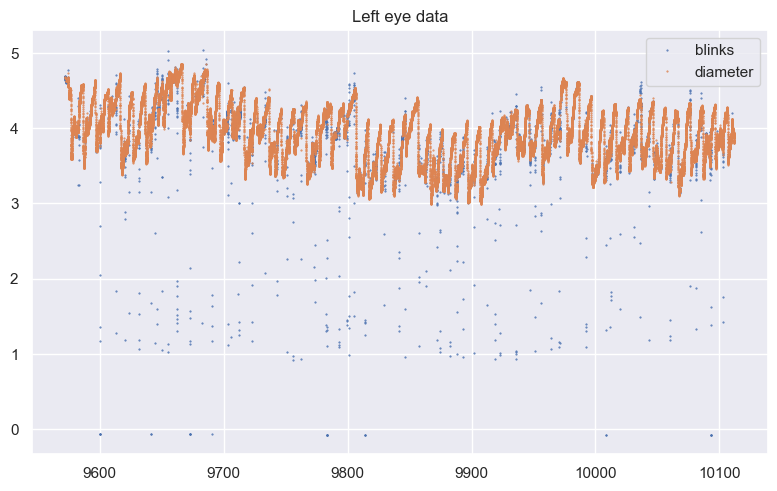

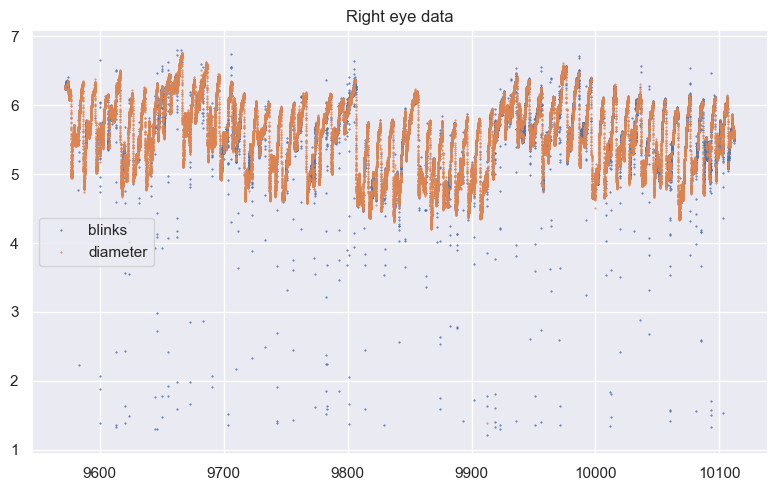

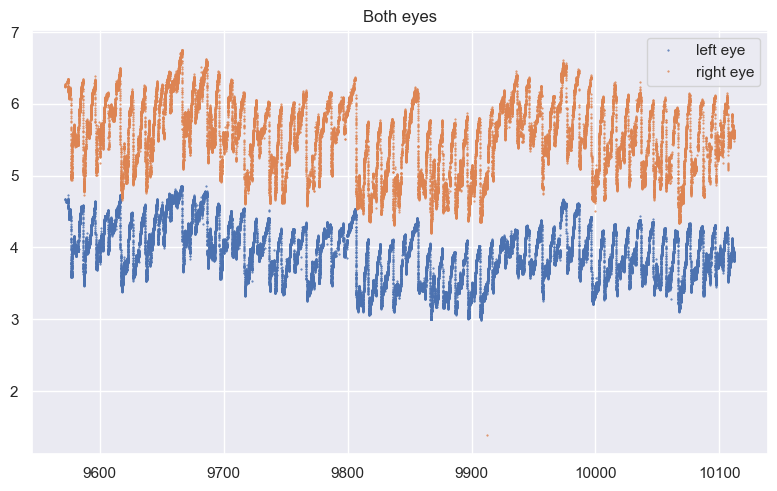

In [167]:
%matplotlib inline
#for left eye
fig, ax=plt.subplots(1,1)
ax.plot(blinks_left_eye['pupil_timestamp'],blinks_left_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_left_eye['pupil_timestamp'],pupil_left_eye['diameter_3d'],'.',markersize=1)
ax.legend(['blinks','diameter'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Left eye data')

#for right eye
fig, ax=plt.subplots(1,1)
ax.plot(blinks_right_eye['pupil_timestamp'],blinks_right_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_right_eye['pupil_timestamp'],pupil_right_eye['diameter_3d'],'.',markersize=1)
ax.legend(['blinks','diameter'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Right eye data')

fig, ax=plt.subplots(1,1)
ax.plot(pupil_left_eye['pupil_timestamp'],pupil_left_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_right_eye['pupil_timestamp'],pupil_right_eye['diameter_3d'],'.',markersize=1)
ax.legend(['left eye','right eye'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Both eyes')



### Do cubic splines aeasily, in the future use a better blink detection algorithm

In [190]:
%matplotlib qt


fig, ax = plt.subplots(2,1,figsize=(15, 8))
ax[0].plot(pupil_left_eye_interpolated['pupil_timestamp'], pupil_left_eye_interpolated['diameter_3d'], 'o', label='data')
ax[0].plot(pupil_left_eye_interpolated['pupil_timestamp'], pupil_left_eye_interpolated['diameter_3d_cubic'],'.', label="interpolated")
ax[0].legend(loc='lower right', ncol=2)
ax[0].set_title('left eye')
ax[0].set_xlabel('sample')
ax[0].set_ylabel('diameter (mm)')


ax[1].plot(pupil_right_eye_interpolated['pupil_timestamp'], pupil_right_eye_interpolated['diameter_3d'], 'o', label='data')
ax[1].plot(pupil_right_eye_interpolated['pupil_timestamp'], pupil_right_eye_interpolated['diameter_3d_cubic'],'.', label="interpolated")
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_title('right eye')
ax[1].set_xlabel('sample')
ax[1].set_ylabel('diameter (mm)')
fig.tight_layout()

usaing smooting splines

## 

In [169]:
time_col_str='timestamp_s'
signal_str='diameter_3d'
sns.set_theme()

%matplotlib qt
fig1, ax=plt.subplots(1,)
ax.plot(pupil_left_eye[time_col_str],pupil_left_eye[signal_str],'.')
for  index, row in annotations_pd[filter_events].iterrows():
    plt.axvline(row[time_col_str], color='r', label='axvline - full height')
    ax.text((row[time_col_str]),3,row['label'])
ax.set_title('pupil diameter and events')    
ax.set_xlabel(f'{time_col_str}')
ax.set_ylabel(f'{signal_str}')
fig1.set_size_inches((18, 5.5))

fig2, ax=plt.subplots(1)
ax.plot(pupil_left_eye[time_col_str],pupil_left_eye[signal_str],'.')
for  index, row in annotations_pd[filter_events_surprise].iterrows():
    plt.axvline(row[time_col_str], color='r', label='axvline - full height')
    ax.text((row[time_col_str]),3,row['label'])
ax.set_title('pupil diameter and events')    
ax.set_xlabel(f'{time_col_str}')
ax.set_ylabel(f'{signal_str}')
fig2.set_size_inches((18, 5.5))

# plt.tight_layout()

## Apply normalizations


### Create different normalization columns

In [170]:
pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
                                            type='z_score')

pupil_right_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_right_eye_interpolated['diameter_3d_cubic'],
                                            type='z_score')

pupil_left_eye['diameter_3d_z_score']=nm.normalize(values=pupil_left_eye['diameter_3d'],
                                            type='z_score')

pupil_right_eye['diameter_3d_z_score']=nm.normalize(values=pupil_right_eye['diameter_3d'],
                                            type='z_score')
pupil_left_eye.head()

C:\Users\arturoV\AppData\Local\Temp\ipykernel_19304\2016220940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
C:\Users\arturoV\AppData\Local\Temp\ipykernel_19304\2016220940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_right_eye_interpolated['diameter_3d_cubic'],
C:\Users\arturoV\AppData\L

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,join_index,on_surf,timestamp_s,diameter_3d_z_score
29753,9572.237214,7630,1,1.0,0.410697,0.409990,46.034292,pye3d 0.3.0 real-time,78.853867,113.281995,...,-2.158703,117.154698,129.508621,170.025058,170.025058,0.0,NaN,True,0.000000,1.978461
29764,9572.261283,7632,1,1.0,0.411005,0.409822,45.970929,pye3d 0.3.0 real-time,78.913003,113.314158,...,-2.157470,117.154698,129.508621,170.025058,170.025058,0.0,NaN,True,0.024069,1.960273
29798,9572.333201,7636,1,1.0,0.410769,0.409980,46.057251,pye3d 0.3.0 real-time,78.867611,113.283755,...,-2.160309,117.154698,129.508621,170.025058,170.025058,0.0,NaN,True,0.095987,1.983674
29832,9572.397243,7640,1,1.0,0.411086,0.410369,45.870961,pye3d 0.3.0 real-time,78.928487,113.209201,...,-2.154813,117.154698,129.508621,170.025058,170.025058,0.0,NaN,True,0.160029,1.935455
29856,9572.445203,7643,1,1.0,0.414414,0.401879,45.894380,pye3d 0.3.0 real-time,79.567404,114.839138,...,-2.136085,117.154698,129.508621,170.025058,170.025058,0.0,NaN,True,0.207989,1.920375


### Filters

In [171]:
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 

filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')


### Asset normalization

In [184]:
#common variables for analysis
pupil_df=pupil_left_eye
signal_str='diameter_3d_z_score'
secons_norm=0.05 # preestimulus frame to normalize
window_s=2.7  # winsow of interest 

# pupil_df['speed']=abs(pupil_df['diameter_3d'].diff(periods=100).rolling(3).median())

frames_norm=np.round(secons_norm*pupil_sampling_freq_left).astype(int)
win_norm=range(frames_norm)
print('Initial frames used for normalization = {} correspond to {}s'.format(frames_norm,secons_norm))

window_frames=np.round(window_s*pupil_sampling_freq_left).astype(int)
print('Windows frames of interest   = {} correspond to {}s'.format(window_frames,window_s))
window=range(0,window_frames)
time_x=np.linspace(0,window_s,window_frames)



Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 335 correspond to 2.7s


In [185]:
# For Assets only window size data
event=annotations_pd.loc[filter_events,['label']].values.flatten()
# event=annotations_pd['label'].values.flatten()
data_dict=dict([(key,[None]) for key in event])# dict with empty keys 

pupil_diameter_df=pd.DataFrame()#pd.DataFrame(data_dict,index=np.arange(0,800))
data_list=[]
for num,im in enumerate(event):
    initial_anotation,end_anotation,index_annotation=cm.extract_annotations_timestamps(im,'label',annotations_pd)
    segmented_df=cm.filter_rows_by_temporal_values(
        dataframe=pupil_df,
        time_column='pupil_timestamp',
        ini_value=initial_anotation['timestamp'].values[0],
        end_value=end_anotation['timestamp'].values[0]
        )
    
    segmented_df=segmented_df.iloc[window]
    win_blank=segmented_df.iloc[win_norm]
    asset_norm=segmented_df[signal_str]-win_blank[signal_str].mean()
    asset_raw=segmented_df[signal_str]
    data_dict[im]=asset_norm.values
pupil_diameter_df=pd.DataFrame(data_dict)


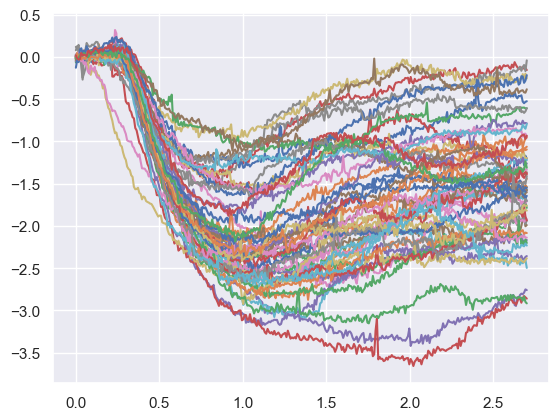

In [186]:
%matplotlib inline
df_plot=pupil_diameter_df
plt.plot(time_x,df_plot)


### With thius new data format i can easily filter out assets with z_scores higher than 2

In [187]:
pupil_diameter_df.describe()

,Asset0015.tif,Asset0034.tif,Asset0004.tif,Asset0010.tif,Asset0048.tif,Asset0026.tif,Asset0044.tif,Asset0016.tif,Asset0040.tif,Surprise02.tif,...,Asset0030.tif,Asset0033.tif,Asset0002.tif,Asset0046.tif,Asset0024.tif,Asset0001.tif,Asset0008.tif,Asset0006.tif,Asset0042.tif,Asset0037.tif
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,-1.471837,-1.777282,-1.636416,-0.527890,-2.382682,-1.756902,-1.647851,-0.619940,-0.410995,-1.862678,...,-1.346348,-1.438605,-1.783568,-1.843234,-1.699272,-1.941493,-1.432290,-1.456553,-1.243791,-1.058488
std,0.727714,0.861492,0.768729,0.467798,1.182233,0.762807,0.860109,0.449999,0.303965,0.935358,...,0.662938,0.670075,0.591486,0.794662,0.736487,0.815071,0.638412,0.693360,0.607605,0.535949
min,-2.376506,-2.874832,-2.421388,-1.425622,-3.420810,-2.444661,-2.714353,-1.532724,-0.975330,-3.085836,...,-2.300894,-2.186364,-2.386084,-2.660594,-2.411859,-2.700569,-2.213850,-2.358363,-2.183982,-1.879968
25%,-2.095354,-2.481685,-2.249598,-0.948866,-3.208874,-2.219396,-2.381679,-0.960393,-0.717720,-2.666480,...,-1.903463,-2.030934,-2.197733,-2.347409,-2.080230,-2.540644,-1.835016,-2.005604,-1.577440,-1.370476
50%,-1.451190,-1.817188,-1.798063,-0.435482,-2.990271,-2.099051,-1.786905,-0.530622,-0.305200,-1.868787,...,-1.272734,-1.563586,-1.949963,-2.145657,-2.010019,-2.232447,-1.558702,-1.576635,-1.346459,-1.145365
75%,-1.342494,-1.557362,-1.540092,-0.174598,-1.877979,-1.821323,-1.319054,-0.309507,-0.168620,-1.608168,...,-1.186016,-1.133100,-1.691026,-1.799159,-1.764134,-1.870840,-1.494010,-1.159693,-1.023469,-0.939212
max,0.121228,0.077496,0.102082,0.219558,0.147638,0.043552,0.112587,0.127193,0.050949,0.053202,...,0.061480,0.080343,0.049778,0.143626,0.048612,0.012702,0.133752,0.067680,0.084727,0.147697


### Do the plots

In [188]:
%matplotlib qt
even_asset=annotations_pd.loc[filter_events,['label']].values.flatten()


mat=pupil_diameter_df.reindex(columns=
                                  even_asset)
fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat)
ax.plot(time_x,np.mean(mat,axis=1),linewidth=5,color='black')
# ax.legend([images,'assets mean'])
ax.set_title('Raw assets and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter(mm)')

event_surprise=annotations_pd.loc[filter_events_surprise,['label']].values.flatten()

mat2=pupil_diameter_df.reindex(columns=
                                  event_surprise)
fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat2)
ax.plot(time_x,np.mean(mat2,axis=1),linewidth=5,color='black')
ax.set_title('Raw surprise and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter (mm)')


fig, ax=plt.subplots(1,1)
# ax.errorbar(time_x,np.median(pupil_diameter_df,axis=1),np.std(pupil_diameter_df,axis=1),linewidth=2,color='blue')
ax.plot(time_x,np.mean(mat,axis=1),linewidth=2,color='black')
ax.errorbar(time_x,np.mean(mat,axis=1),np.std(mat,axis=1),linewidth=0.5,color='blue')
ax.plot(time_x,np.mean(mat2,axis=1),linewidth=2,color='black')
ax.errorbar(time_x,np.mean(mat2,axis=1),np.std(mat2,axis=1),linewidth=0.5,color='red')

# ax.legend(['surprise','assets'])
# ax.set_title('Mean pupilometry')
# ax.set_xlabel('time (s)')
# ax.set_ylabel('speed (s)')

<ErrorbarContainer object of 3 artists>

In [179]:
np.median(pupil_diameter_df,axis=1)

array([-4.75593427e-03,  9.29665333e-03,  1.04813637e-02, -4.34672175e-03,
        3.22637288e-04,  2.10328999e-03,  7.95427886e-03,  1.02252638e-02,
        1.26460782e-02, -3.45874457e-03,  3.26963782e-03,  1.02807597e-02,
        1.15435109e-02,  1.22395084e-02,  8.97876364e-03,  1.51918518e-02,
        1.86535814e-02,  2.06340959e-02,  2.29859599e-02,  1.07680561e-02,
        1.37529821e-02,  1.62098956e-02,  7.43693278e-03,  2.42224840e-02,
        2.19467963e-02,  1.96638359e-02,  1.97181000e-02,  9.67496616e-03,
        1.60098054e-02,  1.10000918e-02,  1.87110859e-02,  2.46931334e-02,
        2.49831296e-02,  1.70175625e-02,  2.38364124e-04,  3.03776736e-03,
        4.52035102e-04, -1.50269011e-02, -3.64634811e-02, -4.22817406e-02,
       -8.79528374e-02, -1.29845867e-01, -1.45425796e-01, -2.05855000e-01,
       -2.24242925e-01, -2.65445926e-01, -3.18798267e-01, -3.65920005e-01,
       -4.17583950e-01, -4.56950391e-01, -5.13947052e-01, -5.55491189e-01,
       -5.85243629e-01, -

In [180]:

mat=pupil_diameter_df.reindex(columns=
                                  even_asset).values
mat[window]


array([[-0.00411789, -0.0053702 , -0.06676297, ...,  0.00626177,
        -0.01451253,  0.01089036],
       [ 0.03081067,  0.01110961, -0.0354997 , ...,  0.03666657,
        -0.02382036, -0.0235171 ],
       [ 0.00185772, -0.01305556,  0.04982596, ..., -0.0320095 ,
        -0.01423603, -0.03579131],
       ...,
       [-1.13012401, -1.42819747, -1.57400414, ..., -0.85475163,
        -1.38210495, -1.03908303],
       [-1.09413566, -1.39047578, -1.5692077 , ..., -0.89537662,
        -1.36417199, -1.06159128],
       [-1.08509903, -1.41624087, -1.55401996, ..., -0.83215316,
        -1.3433952 , -1.05810791]])

## Now lets calculate the speed of change from the normalized data

In [181]:

pupil_events_speed=np.abs(np.diff(pupil_events_matrix))
pupil_surprise_speed=np.abs(np.diff(pupil_surprise_matrix))

NameError: name 'pupil_events_matrix' is not defined

Text(0, 0.5, 'speed (s)')

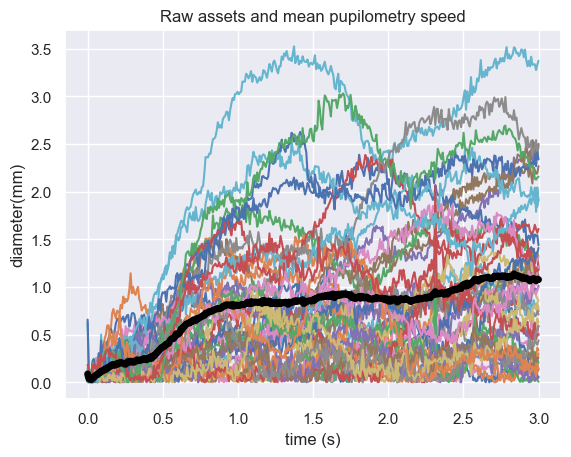

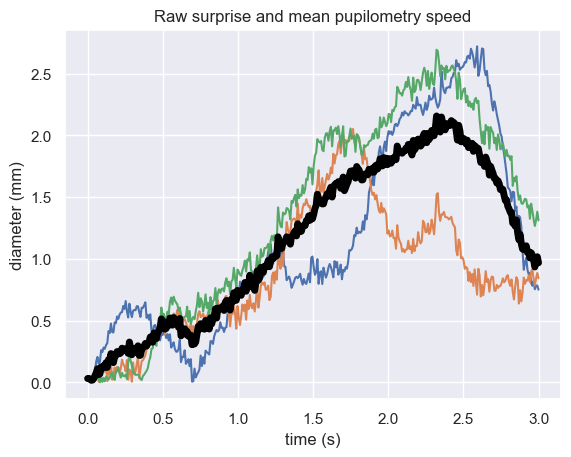

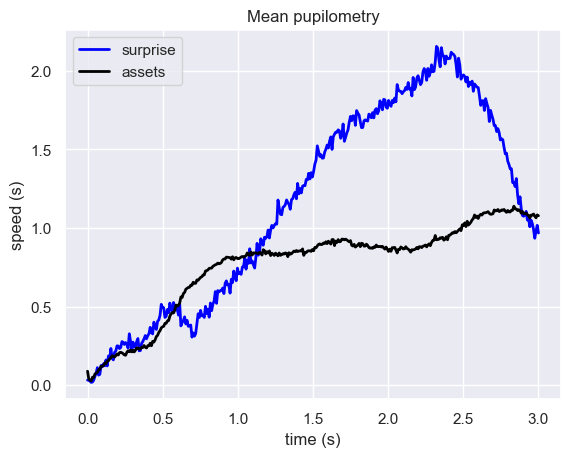

In [ ]:
%matplotlib inline

mat1=pupil_events_speed
mat2=pupil_surprise_speed

fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat1[window])
ax.plot(time_x,np.mean(mat1[window,:],axis=1),linewidth=5,color='black')
# ax.legend([images,'assets mean'])
ax.set_title('Raw assets and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter(mm)')

fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat2[window,:])
ax.plot(time_x,np.mean(mat2[window,:],axis=1),linewidth=5,color='black')
ax.set_title('Raw surprise and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter (mm)')


fig, ax=plt.subplots(1,1)
ax.plot(time_x,np.mean(mat2[window,:],axis=1),linewidth=2,color='blue')
ax.plot(time_x,np.mean(mat1[window,:],axis=1),linewidth=2,color='black')

ax.legend(['surprise','assets'])
ax.set_title('Mean pupilometry')
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (s)')

Exclude data that is over [2,-2] z scores


NameError: name 'pupil_zscore' is not defined

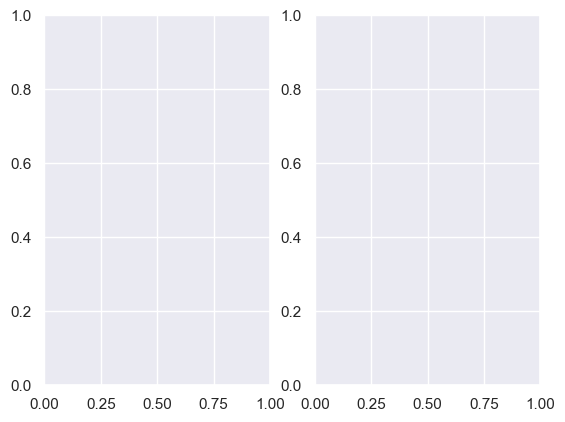

In [ ]:
fig,ax=plt.subplots(1,2)
sns.histplot(pupil_zscore[window,6],ax=ax[0])
sns.histplot(pupil_events_matrix[window,6],ax=ax[1])

In [ ]:
#test sfuntion
sigma=1
mu=10
data_normal=sigma*np.random.randn(70,100) +mu
data_norm=nm.normalize(values=data_normal.reshape(data_normal.size),
                                            type='z_score').reshape(data_normal.shape)
plt.plot(data_normal,'.',color='red')
plt.plot(data_norm,'.',color='blue')
plt.plot(data_normal-10,'.',color='green')


In [ ]:
plt.hist(data_normal)


In [ ]:
pupil_events_matrix.shape[0]

In [ ]:
r=a.reshape(pupil_events_matrix.shape)

In [ ]:
pupil_events_matrix.shape[0]*pupil_events_matrix.shape[1]

In [ ]:
pupil_events_matrix.shape

In [ ]:
# pupil_list=[]
# surface_list=[]
# ref_col=surfaces_pd_frame.columns.get_indexer(['gaze_timestamp'])[0]

# for row in range(20,200):#(surfaces_pd_frame.shape[0]-1):
#         ini_val=surfaces_pd_frame.iloc[row,ref_col]
#         end_value=surfaces_pd_frame.iloc[row+1,ref_col]
#         surface_row=surfaces_pd_frame.iloc[row:row+1]
#         # print(ini_val,end_value)
#         aux_pd_frame=cm.filter_rows_by_temporal_values(
#                 dataframe=pupil_pd_frame,
#                 time_column='pupil_timestamp',
#                 ini_value=ini_val,
#                 end_value=end_value
#                 )
#         aux_pd_frame.insert(0,'horizontal_index',row)
#         surface_row.insert(0,'horizontal_index',row)
#         # aux_pd_frame=aux_pd_frame.join(to_join,rsuffisx='sur_',how='cross')

#         pupil_list.append(aux_pd_frame)
#         surface_list.append(surface_row)
# # final_df=pd.concat(final_df,axis=0)
# # display(final_df)
        
# vert_stack=pd.concat(pupil_list,axis=0)
# horz_stack=pd.concat(surface_list,axis=0)
# vert_stack.head()
# final_df=[]
# for row,index in surfaces_pd_frame.iterrows():
#         ini_val=surfaces_pd_frame.iloc[row]['gaze_timestamp']
#         end_value=surfaces_pd_frame.iloc[row+1]['gaze_timestamp']
#         to_join=surfaces_pd_frame.iloc[row:row+1]
#         # print(ini_val,end_value)
#         aux_pd_frame=cm.filter_rows_by_temporal_values(
#                 dataframe=pupil_pd_frame,
#                 time_column='pupil_timestamp',
#                 ini_value=ini_val,
#                 end_value=end_value
#                 )

#         # aux_pd_frame=aux_pd_frame.join(to_join,rsuffix='sur_',how='cross')
#         final_df.append(aux_pd_frame)
# # final_df=pd.concat(final_df,axis=0)
# # display(final_df)


In [ ]:
df_A = pd.DataFrame({'start_date':['2017-03-27','2017-01-10'],'end_date':['2017-04-20','2017-02-01']})
df_B = pd.DataFrame({'event_date':['2017-01-20','2017-01-27'],'price':[100,200]})

df_A['end_date'] = pd.to_datetime(df_A.end_date)
df_A['start_date'] = pd.to_datetime(df_A.start_date)
df_B['event_date'] = pd.to_datetime(df_B.event_date)
df_B

,event_date,price
0,2017-01-20,100
1,2017-01-27,200


In [ ]:
df_merge = df_A.merge(df_B, how='cross')
df_merge

,start_date,end_date,event_date,price
0,2017-03-27,2017-04-20,2017-01-20,100
1,2017-03-27,2017-04-20,2017-01-27,200
2,2017-01-10,2017-02-01,2017-01-20,100
3,2017-01-10,2017-02-01,2017-01-27,200


In [ ]:
df_merge = df_merge.query('event_date >= start_date and event_date <= end_date')
df_merge

,start_date,end_date,event_date,price
2,2017-01-10,2017-02-01,2017-01-20,100
3,2017-01-10,2017-02-01,2017-01-27,200


In [ ]:
surfaces_pd_frame['start']=surfaces_pd_frame['gaze_timestamp']
surfaces_pd_frame['end']=np.append(surfaces_pd_frame['gaze_timestamp'].values[1:],0)
surfaces_pd_frame.drop(surfaces_pd_frame.tail(1).index,inplace=True)
surfaces_pd_frame['event']=np.arange(len(surfaces_pd_frame))
# idx = pd.IntervalIndex.from_arrays(surfaces_pd_frame['start'], df_2['end'], closed='both')

In [ ]:
surfaces_pd_frame.index = pd.IntervalIndex.from_arrays(surfaces_pd_frame['start'],surfaces_pd_frame['end'],closed='both')
surfaces_pd_frame

,world_timestamp,world_index,gaze_timestamp,x_norm,y_norm,x_scaled,y_scaled,on_surf,confidence,start,end,event
"[14963.464168400002, 14963.468149400003]",14963.529049,0,14963.464168,0.390105,-0.042263,0.390105,-0.042263,False,0.990000,14963.464168,14963.468149,0
"[14963.468149400003, 14963.472153400002]",14963.529049,0,14963.468149,0.385552,-0.102956,0.385552,-0.102956,False,0.990000,14963.468149,14963.472153,1
"[14963.472153400002, 14963.476132400005]",14963.529049,0,14963.472153,0.379080,-0.151352,0.379080,-0.151352,False,0.990000,14963.472153,14963.476132,2
"[14963.476132400005, 14963.4801314]",14963.529049,0,14963.476132,0.373581,-0.219004,0.373581,-0.219004,False,0.990000,14963.476132,14963.480131,3
"[14963.4801314, 14963.4841224]",14963.529049,0,14963.480131,0.366127,-0.282971,0.366127,-0.282971,False,0.990000,14963.480131,14963.484122,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"[15616.681685400004, 15616.685702400002]",15616.684612,38927,15616.681685,0.353888,0.368990,0.353888,0.368990,True,0.918658,15616.681685,15616.685702,159420
"[15616.685702400002, 15616.6896554]",15616.684612,38927,15616.685702,0.333188,0.345879,0.333188,0.345879,True,0.937488,15616.685702,15616.689655,159421
"[15616.6896554, 15616.693664400002]",15616.684612,38927,15616.689655,0.321895,0.354199,0.321895,0.354199,True,0.937488,15616.689655,15616.693664,159422
"[15616.693664400002, 15616.697709400005]",15616.700605,38928,15616.693664,0.296020,0.369735,0.296020,0.369735,True,0.913507,15616.693664,15616.697709,159423


In [ ]:
pupil_pd_frame['event'] = pupil_pd_frame['pupil_timestamp'].apply(lambda x : surfaces_pd_frame.iloc[surfaces_pd_frame.index.get_loc(x)]['event'])

KeyError: 15616.703703400002